### What will be covered today..

> 1. Various agreegation functions.
> 2. Agreegating data using Group by.
> 4. Using Stack/Unstack function.
> 5. Group by with Apply & user define function.
> 6. Group by with one line Lambda function.
> 7. Use of Pivot for Grouping data.
> 8. Class exercise.

#### Import requiered libraries.

In [1]:
import pandas as pd

#### Read the dataset.

In [2]:
df = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

In [3]:
df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 1. Various Agreegated functions.

In [4]:
mean = df['age'].mean() #Mean of age.
mode = df['age'].mode() #Mode of age.
minimum = df['age'].min() #Min of age.
maximum = df['age'].max() #Max of age.
count = df['age'].count() #Count of age.
summ = df['age'].sum() #sum of age.

In [5]:
df['age'].describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,943.0,NaN,NaN,NaN,472.0,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,NaN,NaN,NaN,34.051962,12.19274,7.0,25.0,31.0,43.0,73.0
gender,943,2,M,670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,943,21,student,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,943,795,55414,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import pandasql as ps

In [22]:
str = "Select occupation, sum(case when gender = 'M' then 1 else 0 end) as Gender_M, sum(case when gender = 'F' then 1 else 0 end) as Gender_F from df group by occupation"
df = ps.sqldf(str)

In [23]:
df.head()

,occupation,Gender_M,Gender_F
0,administrator,43,36
1,artist,15,13
2,doctor,7,0
3,educator,69,26
4,engineer,65,2


### 2. Using Unstack with Group by
##### Mail vs Female ratio for each occupation using Unstack.

In [49]:
df_grouped = pd.DataFrame(df.groupby(['occupation','gender']).age.count())
df_grouped.head()

age
occupation    gender     
administrator F        36
              M        43
artist        F        13
              M        15
doctor        M         7

In [156]:
df_unstacked = df_grouped.unstack()
df_unstacked.head()

age      
gender            F     M
occupation               
administrator  36.0  43.0
artist         13.0  15.0
doctor          NaN   7.0
educator       26.0  69.0
engineer        2.0  65.0

In [157]:
df_unstacked.columns = ['F','M']

In [158]:
df_unstacked.head()

,F,M
occupation,,
administrator,36.0,43.0
artist,13.0,15.0
doctor,NaN,7.0
educator,26.0,69.0
engineer,2.0,65.0


In [159]:
df_unstacked['Gen_Ratio'] = df_unstacked.F/df_unstacked.M

In [107]:
df_unstacked.head()

,occupation,F,M,Gen_Ratio
0,administrator,36.0,43.0,0.837209
1,artist,13.0,15.0,0.866667
2,doctor,NaN,7.0,NaN
3,educator,26.0,69.0,0.376812
4,engineer,2.0,65.0,0.030769


In [160]:
df.head()

,age,gender,occupation,zip_code,df_count,gen_count
user_id,,,,,,
1,24,M,technician,85711,1,None
2,53,F,other,94043,0,None
3,23,M,writer,32067,1,None
4,24,M,technician,43537,1,None
5,33,F,other,15213,0,None


### Stack vs UnStack..
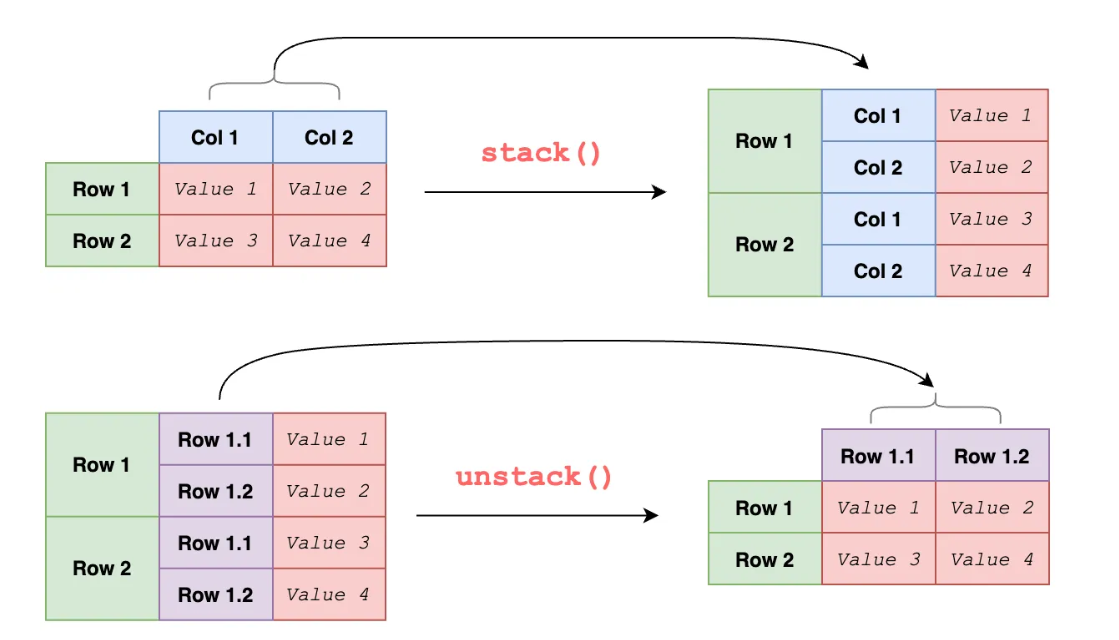

### 3. Group by with user define function & apply
#### Calculate Gender Ratio using function & apply

In [179]:
#### Mail vs Female ratio each occupation using Apply & Function.

In [180]:
def gender_to_numeric_M(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

In [181]:
def gender_to_numeric_F(x):
    if x == 'F':
        return 1
    if x == 'M':
        return 0

In [182]:
df['Gender_M'] = df.gender.apply(gender_to_numeric_M)
df['Gender_F'] = df.gender.apply(gender_to_numeric_F)

In [183]:
df.head()

,age,gender,occupation,zip_code,Legal_Age_for_drinking,Gender_M,Gender_F,Male_count,Female_count
user_id,,,,,,,,,
1,24,M,technician,85711,No,1,0,1,0
2,53,F,other,94043,Yes,0,1,0,1
3,23,M,writer,32067,No,1,0,1,0
4,24,M,technician,43537,No,1,0,1,0
5,33,F,other,15213,Yes,0,1,0,1


In [184]:
df_numeric = df.groupby(['occupation']).sum()[['Gender_M','Gender_F']]
df_numeric.head()

,Gender_M,Gender_F
occupation,,
administrator,43,36
artist,15,13
doctor,7,0
educator,69,26
engineer,65,2


In [185]:
df_numeric['Ration'] = df_numeric['Gender_F']/df_numeric['Gender_M']

### 4.Group by using Lambda function.

In [186]:
df['Male_count'] = df.gender.apply(lambda x: 1 if (x == 'M') else 0)
df['Female_count'] = df.gender.apply(lambda x: 1 if (x == 'F') else 0)

In [187]:
df.head()

,age,gender,occupation,zip_code,Legal_Age_for_drinking,Gender_M,Gender_F,Male_count,Female_count
user_id,,,,,,,,,
1,24,M,technician,85711,No,1,0,1,0
2,53,F,other,94043,Yes,0,1,0,1
3,23,M,writer,32067,No,1,0,1,0
4,24,M,technician,43537,No,1,0,1,0
5,33,F,other,15213,Yes,0,1,0,1


In [188]:
df_gen_count = df.groupby(['occupation']).sum()[['Male_count','Female_count']]
df_gen_count.head()

,Male_count,Female_count
occupation,,
administrator,43,36
artist,15,13
doctor,7,0
educator,69,26
engineer,65,2


###  5. Group by with Pivot Table.

In [190]:
# Calculate the Ration of Male & female in each group with each Method..
# Calculate the % of Male & female in each group with All Methods..

In [43]:
df_pivot = (df.pivot_table(index='occupation', 
                      columns='gender', 
                      values='age', 
                      aggfunc='count')
         .reset_index()
         .rename_axis(None, axis=1))

In [44]:
df_pivot.head()

,occupation,F,M
0,administrator,36.0,43.0
1,artist,13.0,15.0
2,doctor,NaN,7.0
3,educator,26.0,69.0
4,engineer,2.0,65.0


In [263]:
## df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'
## df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met'

In [266]:
# df['Gen_count'] = df.gender.apply(lambda x: 1 if (x == 'M') else 0)

df.loc[df.gender == 'M', 'Gender_new' ] = 1
df.loc[df.gender == 'F', 'Gender_new' ] = 0

### 6. Muiltilevel agreegation using group by

In [13]:
df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [16]:
df.groupby('occupation').agg({'age':['mean','count','std'],'gender':'count'})

age                  gender
                    mean count        std  count
occupation                                      
administrator  38.746835    79  11.123397     79
artist         31.392857    28   8.668116     28
doctor         43.571429     7  12.501428      7
educator       42.010526    95  10.413264     95
engineer       36.388060    67  11.199236     67
entertainment  29.222222    18  10.056052     18
executive      38.718750    32  10.608075     32
healthcare     41.562500    16  11.313524     16
homemaker      32.571429     7  10.737119      7
lawyer         36.750000    12  10.830303     12
librarian      40.000000    51  11.023611     51
marketing      37.615385    26   9.474500     26
none           26.555556     9  13.757826      9
other          34.523810   105  10.738227    105
programmer     33.121212    66   9.624512     66
retired        63.071429    14   5.757461     14
salesman       35.666667    12  14.079859     12
scientist      35.548387    31   7.392964     31
student        22.081633   196   5.284081    196
technician     33.148148    27   9.867210     27
writer         36.311111    45  11.423306     45

### Transpose in Python

In [267]:
df.head()

,age,gender,occupation,zip_code,Gender_N,Gen_count,Gender_new
user_id,,,,,,,
1,24,M,technician,85711,1,1,1.0
2,53,F,other,94043,0,0,0.0
3,23,M,writer,32067,1,1,1.0
4,24,M,technician,43537,1,1,1.0
5,33,F,other,15213,0,0,0.0


#### Transpose a pandas dataframe.

In [269]:
df_pivot.transpose()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
occupation,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
F,36.0,13.0,NaN,26.0,2.0,2.0,3.0,11.0,6.0,2.0,...,10.0,4.0,36.0,6.0,1.0,3.0,3.0,60.0,1.0,19.0
M,43.0,15.0,7.0,69.0,65.0,16.0,29.0,5.0,1.0,10.0,...,16.0,5.0,69.0,60.0,13.0,9.0,28.0,136.0,26.0,26.0


### Quiz-- Read the below dataset and find top 5 items on the basis of total sales.

In [19]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
Sale = pd.read_csv(url, sep = '\t')

In [21]:
Sale.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [22]:
Sale.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [28]:
Sale['item_price_num'] = Sale.item_price.str[1:].astype(float)

In [29]:
Sale.head()

,order_id,quantity,item_name,choice_description,item_price,Tot_sale,item_price_num
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,16.98


In [30]:
Sale.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price             object
Tot_sale              float64
item_price_num        float64
dtype: object

In [31]:
Sale['Tot_sale'] = Sale.item_price_num*Sale.quantity

In [32]:
Sale.head()

,order_id,quantity,item_name,choice_description,item_price,Tot_sale,item_price_num
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,33.96,16.98


In [42]:
Sale.groupby('item_name').Tot_sale.sum().sort_values(ascending=False).head(5).index.to_list()

['Chicken Bowl',
 'Chicken Burrito',
 'Steak Burrito',
 'Steak Bowl',
 'Chips and Guacamole']